##OBSERVATIONS FROM DATA
There were almost the same amount of male to female mice; 123 female and 125 male, for a total count of 248 mice. 

The bar graph shows that the Capomulin have the most timepoints of data, so these mice have possibly lived longer than other drugs as they have more timepoints compared to other drug regimens.

Both Capomulin and Ramicane have on average the smallest tumor volume compared to the other drug regimens, both of theirs were close to 40mm while the other regimens were in the low to mid 50mms.

Looking at the Capomulin drug regimen, as the weight of the mouse goes down the weight of the tumor decreases as well. 

In [1]:
 # Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "../data/Mouse_metadata.csv"
study_results_path = "../data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)

study_results = pd.read_csv(study_results_path)
# Combine the data into a single dataset
mouse_data=pd.merge(mouse_metadata,study_results, how='left', on='Mouse ID')
# Display the data table for preview
mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mouse_data["Mouse ID"].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint
drop_dup_mouse_id = mouse_data.loc[mouse_data.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
drop_dup_mouse_id

array(['g989'], dtype=object)

In [4]:
 # Optional: Get all the data for the duplicate mouse ID. 
bad_mouse= mouse_data[mouse_data["Mouse ID"] == "g989"]
bad_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
 # Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_data=mouse_data.drop(mouse_data[mouse_data["Mouse ID"] == 'g989'].index)
clean_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
 # Checking the number of mice in the clean DataFrame.
clean_mouse_data["Mouse ID"].nunique()

248

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regim

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

#group the data by the drugs
grouped_data= clean_mouse_data.groupby(['Drug Regimen'])

#finding all of the above by using grouped data for drug regimen by the volume of tumor
mean_1 = grouped_data['Tumor Volume (mm3)'].mean()
median_1=grouped_data['Tumor Volume (mm3)'].median()
var_1=grouped_data['Tumor Volume (mm3)'].var()
std_1=grouped_data['Tumor Volume (mm3)'].std()
sem_1=grouped_data['Tumor Volume (mm3)'].sem()

#creating a dataframe to view all of the data
summary_table_df=pd.DataFrame({"Mean": mean_1, "Median" : median_1, "Variance" : var_1, "Standard Deviation" : std_1, "SEM": sem_1} )
summary_table_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
#use the agg formula, first groupby drug then call agg then enterin the functions, then specifiy the tumor to only pull that data
clean_mouse_data.groupby('Drug Regimen').agg(['mean','median','var','std','sem'])['Tumor Volume (mm3)']

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


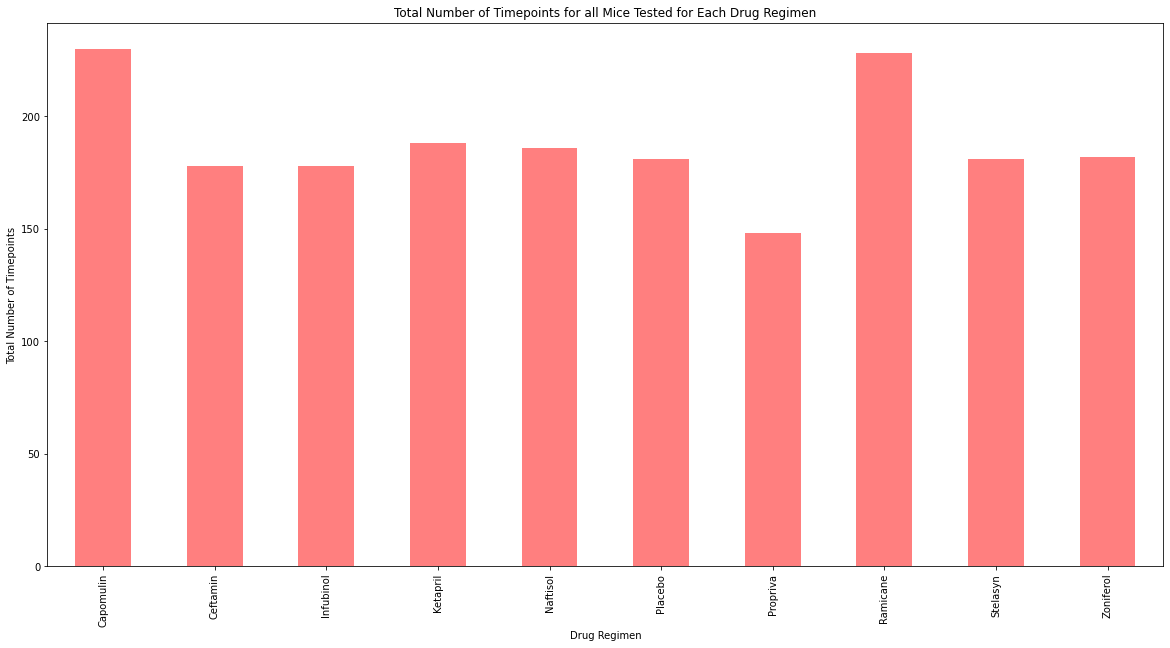

In [54]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
%matplotlib inline
timepoint_per_drug= clean_mouse_data.groupby("Drug Regimen").count()["Timepoint"]
timepoint_per_drug.plot.bar(figsize=(20,10), color='r', alpha=0.5,title="Total Number of Timepoints for all Mice Tested for Each Drug Regimen", ylabel="Total Number of Timepoints");


AttributeError: 'Rectangle' object has no property 'ylabel'

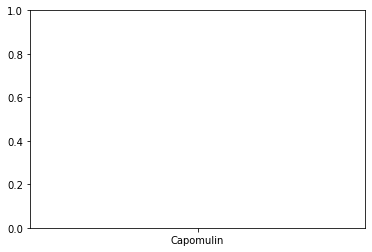

In [62]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
%matplotlib inline
x=['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']
timepoints=[230,178,178,188,186,181,148,228,181,182]

plt.bar(x, timepoints, color='r', alpha=0.5, ylabel="Total Number of Timepoints")

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
%matplotlib inline
#sorting and then creating data frame to group by id and then gender
gender_grouped=clean_mouse_data.groupby(["Mouse ID","Sex"])
gender=pd.DataFrame(gender_grouped.size())

#count the gender into a total count and name column gender count
mouse_gender=pd.DataFrame(gender.groupby(["Sex"]).count())
mouse_gender.columns=["Gender Count"]
mouse_gender

,Gender Count
Sex,
Female,123
Male,125


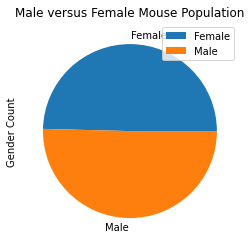

In [37]:
%matplotlib inline
mouse_gender.plot.pie(y='Gender Count')
plt.title('Male versus Female Mouse Population')
plt.show()

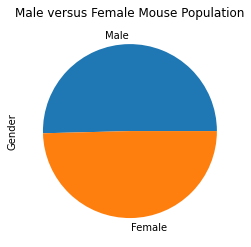

In [45]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#create labels
labels=["Male", "Female"]
#create count for gender
counts=[125,123]

plt.pie(counts, labels=labels);
plt.title('Male versus Female Mouse Population');
plt.ylabel("Gender");



In [47]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_mouse_data.groupby("Mouse ID").max()["Timepoint"]

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_df=pd.merge(clean_mouse_data, last_timepoint, how='inner', on=('Mouse ID','Timepoint'))
#create df for all drugs required
merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
243,z314,Stelasyn,Female,21,28,5,45.934712,0
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [13]:
capomulin_df=clean_mouse_data.loc[clean_mouse_data["Drug Regimen"]=="Capomulin",:]
ramicane_df=clean_mouse_data.loc[clean_mouse_data["Drug Regimen"]=="Ramicane",:]
Infubinol_df=clean_mouse_data.loc[clean_mouse_data["Drug Regimen"]=="Infubinol",:]
Ceftamin_df=clean_mouse_data.loc[clean_mouse_data["Drug Regimen"]=="Ceftamin",:]

capomulin_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [14]:
 Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds

SyntaxError: invalid syntax (<ipython-input-14-8dd00490295d>, line 1)

In [15]:
 # Generate a box plot of the final tumor volume of each mouse across four regimens of interest

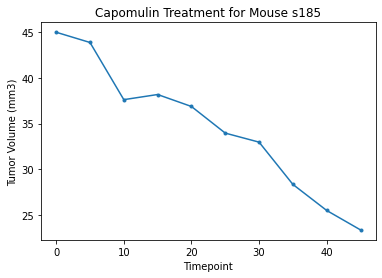

In [28]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
line_plot_df= clean_mouse_data.loc[clean_mouse_data["Mouse ID"]=="s185",:]
line_plot_df
x_axis=line_plot_df["Timepoint"]
tumorsize=line_plot_df["Tumor Volume (mm3)"]

plt.title("Capomulin Treatment for Mouse s185")
plt.plot(x_axis,tumorsize, marker=".", )
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

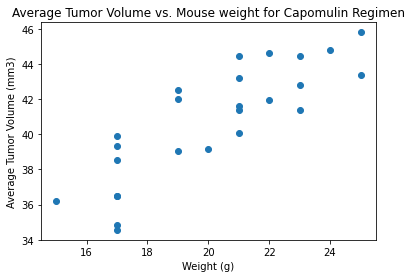

In [46]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
#create calucation for average tumor volume by capomulin 
avg_tumor_vol =capomulin_df.groupby(['Mouse ID']).mean()

plt.scatter(avg_tumor_vol['Weight (g)'],avg_tumor_vol['Tumor Volume (mm3)'])
plt.title('Average Tumor Volume vs. Mouse weight for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)');


In [33]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
#using pearsonr to find the correlation coefficient for capomilin regimen
corr=round(st.pearsonr(avg_tumor_vol['Weight (g)'],avg_tumor_vol['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume for the Capomilin regimen is {corr}")

The correlation between mouse weight and average tumor volume for the Capomilin regimen is 0.84


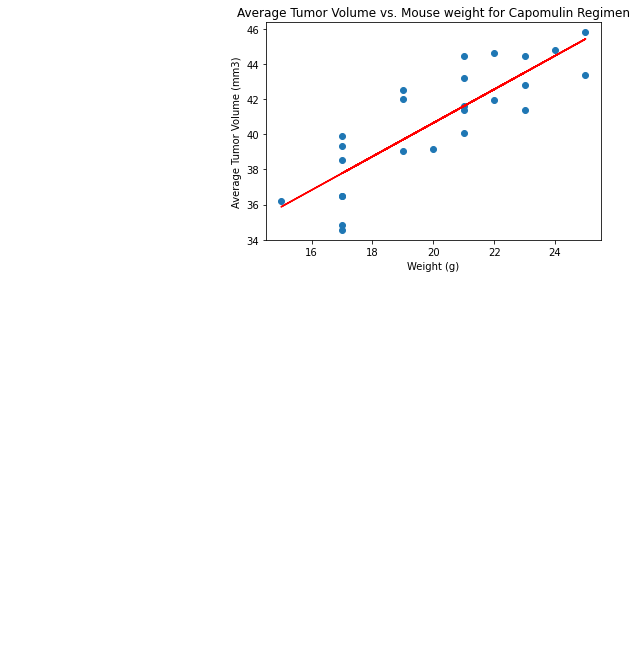

In [52]:
from scipy.stats import linregress
x_values = avg_tumor_vol['Weight (g)']
y_values = avg_tumor_vol['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Average Tumor Volume vs. Mouse weight for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)');